In [49]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing


In [50]:

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [51]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


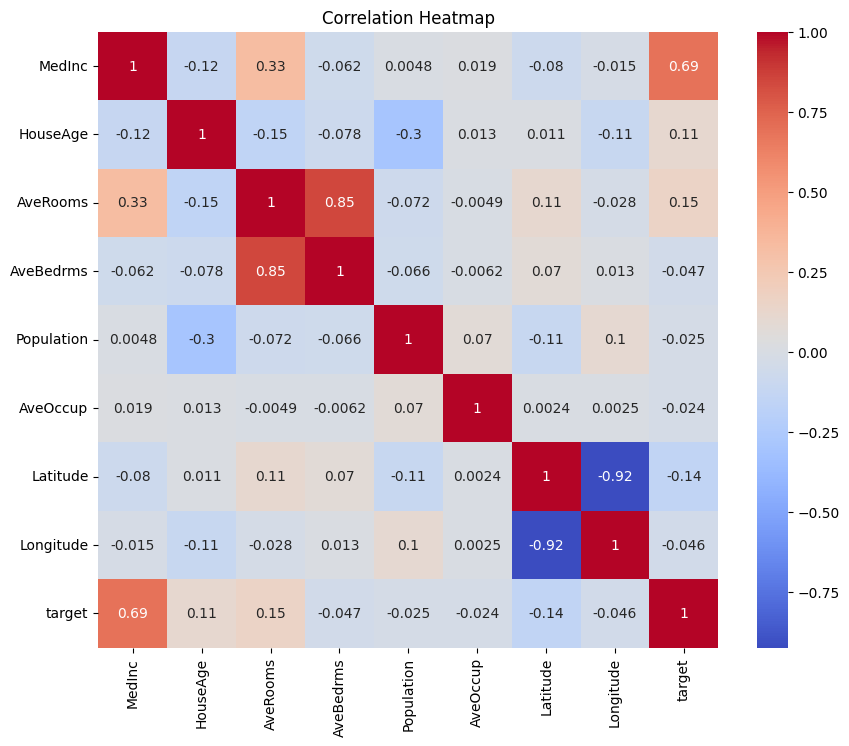

In [53]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [54]:
X = df.drop("target", axis=1)
y = df["target"]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)
X_train, y_train

(array([[ 0.01170085, -0.76593507, -0.18378572, ..., -0.01695138,
         -0.71719695,  0.87832255],
        [ 1.71390181, -1.08376738,  0.6077822 , ...,  0.04295909,
          0.77631821, -1.09324378],
        [ 0.60198107, -1.08376738,  0.50288569, ..., -0.04908919,
          0.97295657, -1.18308731],
        ...,
        [-0.49283239,  0.58485227, -0.58294927, ...,  0.02517025,
         -0.74997001,  0.59381804],
        [ 0.97302487, -1.08376738,  0.39058403, ...,  0.01042151,
          0.91209231, -1.19306993],
        [-0.68174943,  1.85618152, -0.81905034, ..., -0.09262259,
          1.00104776, -1.42267006]]),
 5967     1.446
 17744    2.779
 952      2.711
 9361     4.705
 11024    2.181
          ...  
 11284    2.292
 11964    0.978
 5390     2.221
 860      2.835
 15795    3.250
 Name: target, Length: 10320, dtype: float64)

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.5308982353071017
R² Score: 0.5994640188595044


In [58]:
scores = cross_val_score(model, X_scaled, y, cv=5, scoring="r2")
print("Cross-Validation R² Scores:", scores)
print("Mean Cross-Validation R² Score:", np.mean(scores))


Cross-Validation R² Scores: [0.54866323 0.46820691 0.55078434 0.53698703 0.66051406]
Mean Cross-Validation R² Score: 0.5530311140279561


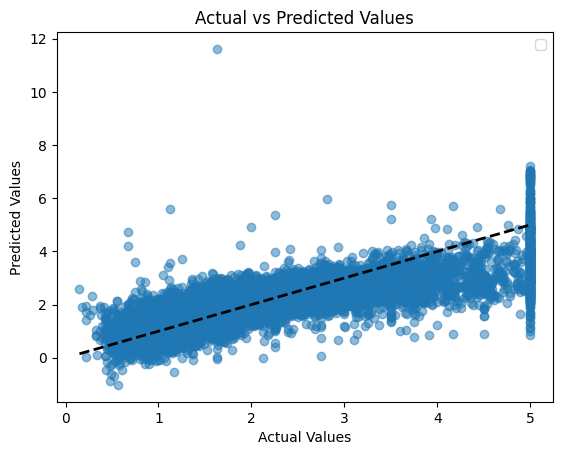

In [59]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()
